In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Create new default settings for ALL figures

In [274]:
%%capture

# Send gridlines to back (behind the graphical elements)
plt.rc('axes', axisbelow=True)

# Set figure size
plt.rc('figure', figsize=(10, 5))

# Set gridlines and ticks
plt.rc('axes', grid=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)

#----------------------------------------------------
# I've yet to find a way to set and customise default MINOR and MAJOR gridlines, and so I'll assign them throughout as:    

# plt.grid(which='minor', c='lightgrey')
# plt.grid(which='major', c='grey')
#----------------------------------------------------

# Import dataset

In [275]:
df1 = pd.read_csv('datasets/uber-raw-data-jun14.csv')
df1.tail()

,Date/Time,Lat,Lon,Base
663839,6/30/2014 22:40:00,40.7332,-73.9872,B02764
663840,6/30/2014 23:12:00,40.7905,-73.9796,B02764
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764
663843,6/30/2014 23:35:00,40.7404,-73.9848,B02764


# Convert datatime into pandas form - !! takes a few minutes !!

In [276]:
df1['Date/Time'] = df1['Date/Time'].map(pd.to_datetime) 
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512


# Add 3 columns for day of month, weekday and hour

In [277]:
# Create day of month column
def get_dom(dt):
    return dt.day

df1['dom'] = df1['Date/Time'].map(get_dom)


# Create weekday column
def get_weekday(dt):
    return dt.weekday()

df1['weekday'] = df1['Date/Time'].map(get_weekday)


# Create hour column
def get_hour(dt):
    return dt.hour

df1['hour'] = df1['Date/Time'].map(get_hour)


df1.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-06-01 00:00:00,40.7293,-73.9920,B02512,1,6,0
1,2014-06-01 00:01:00,40.7131,-74.0097,B02512,1,6,0
2,2014-06-01 00:04:00,40.3461,-74.6610,B02512,1,6,0
3,2014-06-01 00:04:00,40.7555,-73.9833,B02512,1,6,0
4,2014-06-01 00:07:00,40.6880,-74.1831,B02512,1,6,0


# Plot day of month data as histogram

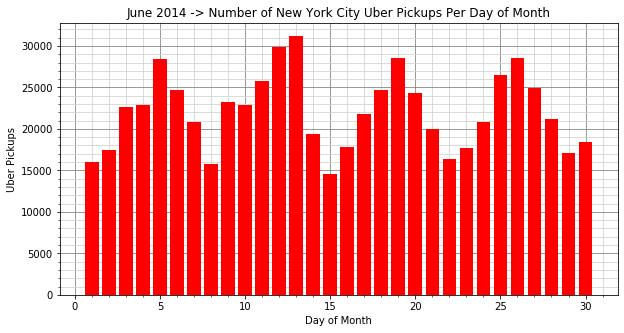

In [278]:
plt.hist(df1.dom, bins=30, rwidth=.8, range=(.5, 30.5), color='r')

plt.title('June 2014 -> Number of New York City Uber Pickups Per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# From df1, sort day of month from least to most pickups

In [279]:
# Count number of rows
by_dom = df1.groupby('dom').apply(len)

by_dom_sorted = by_dom.sort_values()
by_dom_sorted


dom
15    14511
8     15749
1     15967
22    16322
29    17107
2     17503
23    17735
16    17778
30    18395
14    19327
21    19940
24    20779
7     20889
28    21208
17    21807
3     22674
4     22831
10    22874
9     23244
20    24271
18    24647
6     24683
27    24895
11    25716
25    26460
5     28371
26    28516
19    28594
12    29844
13    31207
dtype: int64

# Plot data 'by_dom_sorted' as line graph

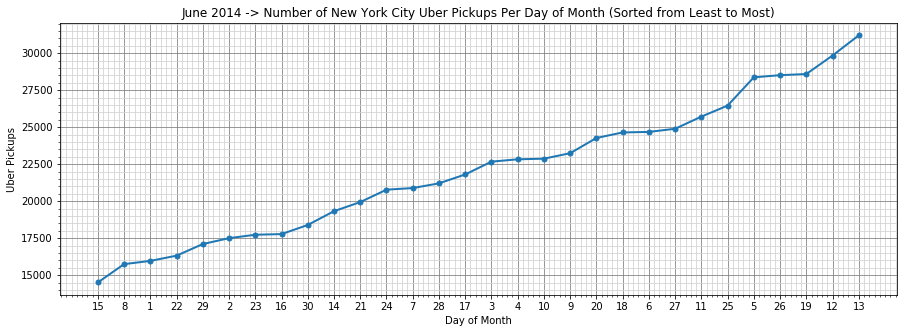

In [280]:
# Increase figure width to better view the x-axis
plt.figure(figsize=(15, 5))

plt.plot(range(1,31), by_dom_sorted, lw=2, marker='.', ms=10)
plt.xticks(range(1, 31), by_dom_sorted.index)

plt.title('June 2014 -> Number of New York City Uber Pickups Per Day of Month (Sorted from Least to Most)')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot weekday data as histogram


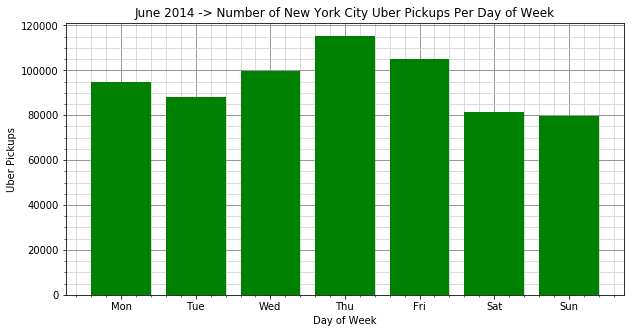

In [281]:
plt.hist(df1.weekday, bins=7, rwidth=.8, range=(-.5, 6.5), color='g')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

plt.title('June 2014 -> Number of New York City Uber Pickups Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot hour data as histogram (24hr axis => 5=5am, 20=8pm)

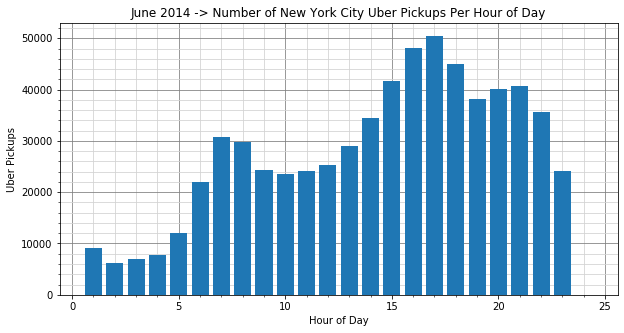

In [282]:
plt.hist(df1.hour, bins=24, rwidth=.8, range=(.5, 24.5))

plt.title('June 2014 -> Number of New York City Uber Pickups Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Cross analysis (hour, day of week)

In [283]:
df2 = df1.groupby('weekday hour'.split()).apply(len).unstack()
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,912,512,420,1049,1712,2747,4674,6338,5971,4264,...,4930,5758,6983,7306,5741,5243,5354,4771,3230,1911
1,722,415,291,507,884,1680,3511,5064,4338,3075,...,4739,5802,7224,8112,6578,5271,5920,5468,3654,1980
2,996,522,394,644,937,1717,3833,5627,4793,3567,...,5286,6561,7630,8195,7367,5983,6639,6525,5128,2695
3,1363,751,479,751,1116,2108,4355,5993,5697,4357,...,5588,6931,7660,8688,7946,7236,8369,8218,7155,4269
4,1836,1112,687,952,1248,1838,3465,5122,5169,3934,...,5245,6405,7267,8141,7942,6014,5165,5990,6454,5594
5,3550,2362,1475,1298,844,911,1137,1391,1902,2443,...,3927,4794,5770,4973,5136,4293,4575,5534,6541,5861
6,5135,3493,2443,1736,960,954,1055,1299,1901,2658,...,4713,5335,5628,5037,4303,4163,4086,4285,3452,1872


# Plot df2 as heatmap

Text(0.5, 1, 'June 2014 -> Heatmap to Show Most (lighter) Popular Time and Day')

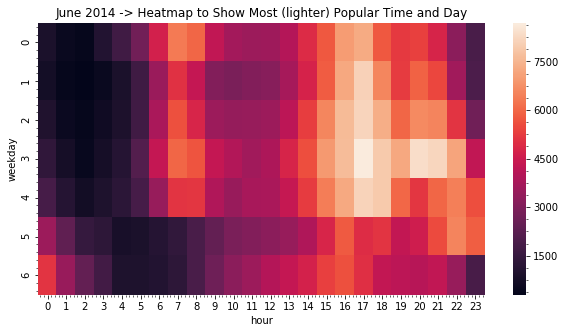

In [284]:
ax = sb.heatmap(df2)

ax.set_title("June 2014 -> Heatmap to Show Most (lighter) Popular Time and Day")

# Plot latitude and longitude data on same graph

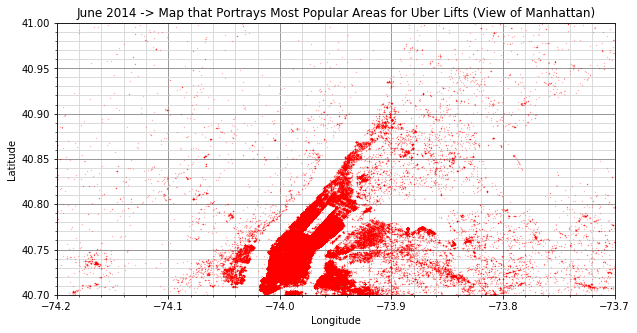

In [285]:
plt.plot(df1['Lon'], df1['Lat'], '.', ms=.5, alpha=.5, c='r')
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.title('June 2014 -> Map that Portrays Most Popular Areas for Uber Lifts (View of Manhattan)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')